In [5]:
# Use modules from parent directory
import os
import sys
import tifffile as tiff
import numpy as np
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000   
from matplotlib import pyplot as plt

sys.path.insert(0, '../')
%load_ext autoreload
%autoreload 2
from srcv2_2.models.params import get_params
from srcv2_2.models.Unet import Unet
from srcv2_2.visualization.make_image_files import visualize_test_data, __visualize_landsat8_tile__
from srcv2_2.visualization.visualization_utils import get_predicted_thumbnails 
from srcv2_2.utils import get_model_name

import tensorflow as tf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
params = get_params('U-net', 'Landsat8')
#params.cls = ['cloud', 'thin'] # clear, cloud, shadow, snow, water
#params.project_path = "/home/mxh/RS-Net/"
#activation_func='relu'
#params.learning_rate =1e-3
#params.epochs = 20
#params.threshold = 0.5
#params.dropout = 0
#params.L2reg = 0
#params.decay = 0
#params.num_gpus = 1

tile = 'all'  # Name of one tile or 'all'
#tile = 'L2A_T32UNF_20170803T103019' 

model = Unet(params)

No weights found


In [7]:
tf.keras.saving.get_custom_objects()

{'Custom>Adadelta': keras.src.optimizers.adadelta.Adadelta,
 'Custom>Adafactor': keras.src.optimizers.adafactor.Adafactor,
 'Custom>Adagrad': keras.src.optimizers.adagrad.Adagrad,
 'Custom>Adam': keras.src.optimizers.adam.Adam,
 'Custom>Adamax': keras.src.optimizers.adamax.Adamax,
 'Custom>AdamW': keras.src.optimizers.adamw.AdamW,
 'Custom>Ftrl': keras.src.optimizers.ftrl.Ftrl,
 'Custom>Lion': keras.src.optimizers.lion.Lion,
 'Custom>Nadam': keras.src.optimizers.nadam.Nadam,
 'Custom>RMSprop': keras.src.optimizers.rmsprop.RMSprop,
 'Custom>SGD': keras.src.optimizers.sgd.SGD,
 'Custom>CustomScaleLayer': keras.src.applications.inception_resnet_v2.CustomScaleLayer,
 'Custom>SharpnessAwareMinimization': keras.src.models.sharpness_aware_minimization.SharpnessAwareMinimization,
 'Custom>HParams': srcv2_2.models.params.HParams,
 'Custom>get_params': <function srcv2_2.models.params.get_params(model, satellite)>,
 'Custom>jaccard_coef': <function srcv2_2.models.model_utils.jaccard_coef(y_true, 

In [8]:
# Create a new model instance
#model = Unet(params)

# Restore the weights

# custom object can (probably only be loaded, if kernel has them from training still)

loaded_model = tf.keras.saving.load_model("../models/Unet/Unet_Landsat8_240202151722-CV2of2_240202151722-CV2of2.keras",
                                    custom_objects=tf.keras.saving.get_custom_objects(), compile=True)

loaded_model.summary()

#therefore saving as 'tf' format and loading with custom objects/classes
#model = tf.keras.saving.load_model("../models/Unet/Unet_Landsat8_<id>-CV1of2.tf")

# Evaluate the model
#loss, acc = model.evaluate(params.test_tiles, params.cls, verbose=2)
#print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 7)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 256, 256, 32)         2048      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_10 (Ba  (None, 256, 256, 32)         128       ['conv2d_19[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 conv2d_20 (Conv2D)          (None, 256, 256, 32)         9248      ['batch_normalization_10

In [9]:
x = tf.random.uniform((10, 256, 256, 7))
assert np.allclose(model.predict(x), loaded_model.predict(x))
model.predict()

1/1 [==============================] - 0s 100ms/step


AssertionError: 

In [ ]:
loaded_model.predict()

In [3]:
model.train(num_gpus, params)

------------------------------------------
Always training from scratch at the moment
------------------------------------------
Start training:
Epoch 1/20
40/40 [==============================] - 31s 768ms/step - loss: 0.3945 - binary_crossentropy: 0.3945 - jaccard_coef: 0.5849 - jaccard_coef_thresholded: 0.6765 - acc: 0.8286 - val_loss: 1.2393 - val_binary_crossentropy: 1.2393 - val_jaccard_coef: 0.0599 - val_jaccard_coef_thresholded: 7.8936e-04 - val_acc: 0.6128
Epoch 2/20
40/40 [==============================] - 26s 661ms/step - loss: 0.3393 - binary_crossentropy: 0.3393 - jaccard_coef: 0.6171 - jaccard_coef_thresholded: 0.7015 - acc: 0.8517 - val_loss: 2.2239 - val_binary_crossentropy: 2.2239 - val_jaccard_coef: 0.3899 - val_jaccard_coef_thresholded: 0.3933 - val_acc: 0.3958
Epoch 3/20
40/40 [==============================] - 27s 668ms/step - loss: 0.3156 - binary_crossentropy: 0.3156 - jaccard_coef: 0.6406 - jaccard_coef_thresholded: 0.7315 - acc: 0.8649 - val_loss: 1.0128 - val_

In [4]:
if tile == 'all':
    visualize_test_data(model, num_gpus, params)
else:
    visualize_tile(model, tile, num_gpus, params)

-----------------------------------------------------------------------------------------------------
Evaluating tile ( 1 of 4 ) : LC80070662014234LGN00
Data loaded in             : 4.6870176792144775s
Prediction finished in     : 16.200558185577393s
Images saved in            : 1.4264230728149414s
---
Evaluating tile ( 2 of 4 ) : LC80441162013330LGN00
Data loaded in             : 6.552696466445923s
Prediction finished in     : 20.910080432891846s
Images saved in            : 1.8913872241973877s
---
Evaluating tile ( 3 of 4 ) : LC81590362014051LGN00
Data loaded in             : 4.683635711669922s
Prediction finished in     : 16.338401794433594s
Images saved in            : 1.406282901763916s
---
Evaluating tile ( 4 of 4 ) : LC81620432014072LGN00
Data loaded in             : 4.690742015838623s
Prediction finished in     : 17.20685386657715s
Images saved in            : 1.4242756366729736s
---


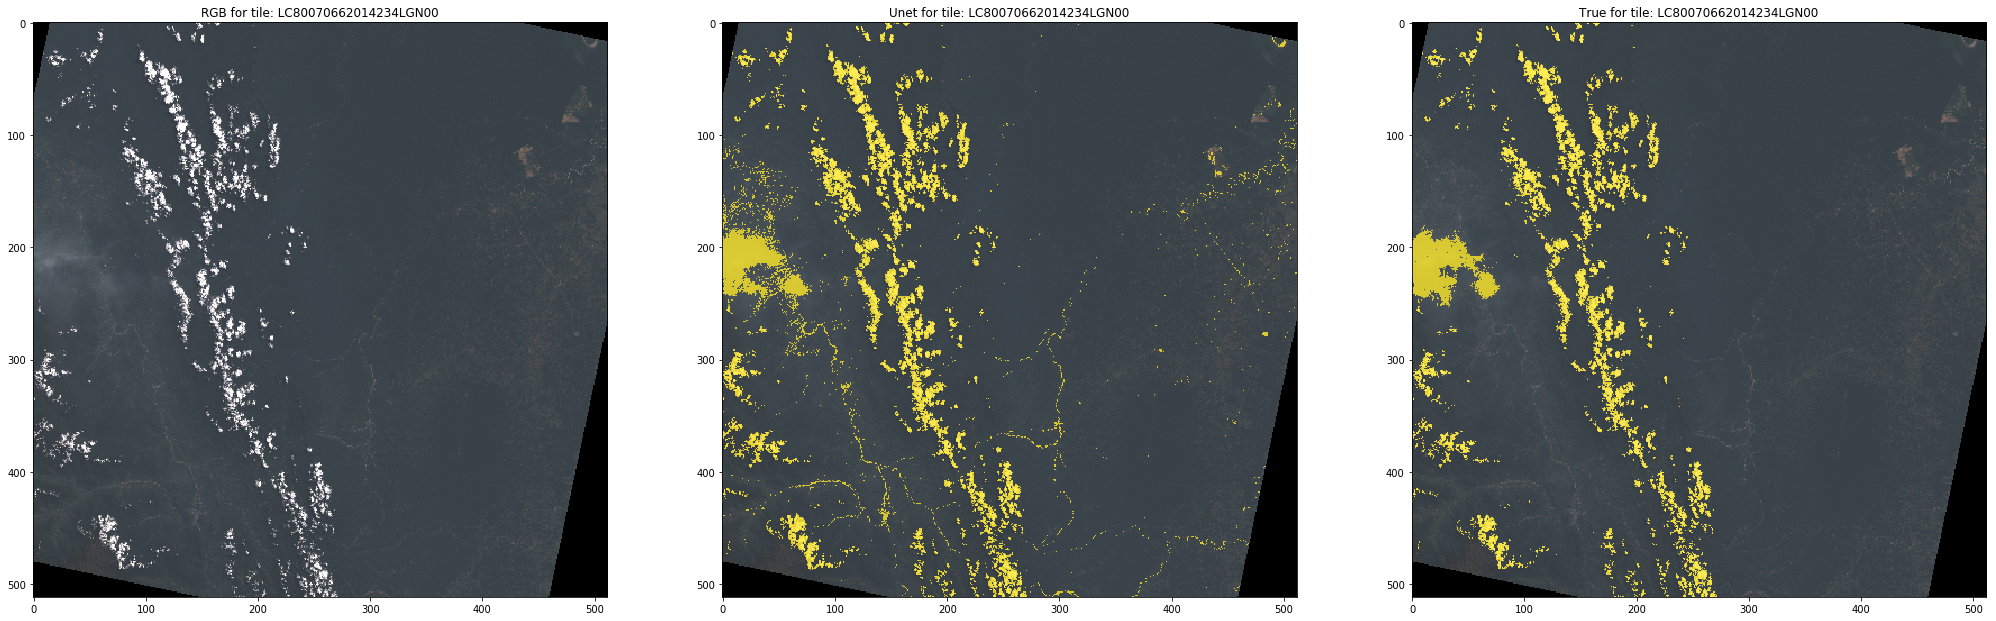

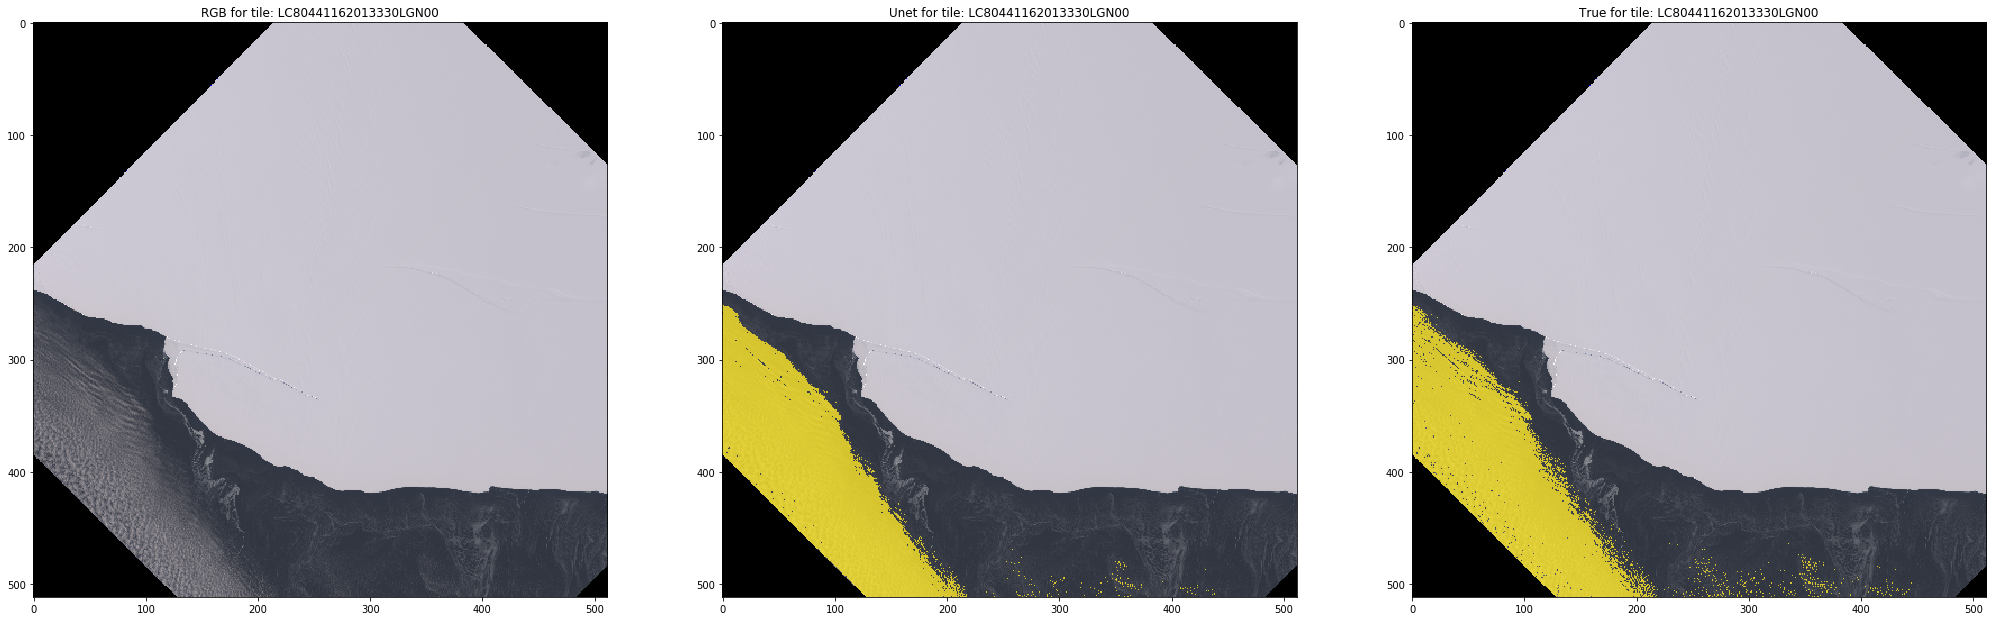

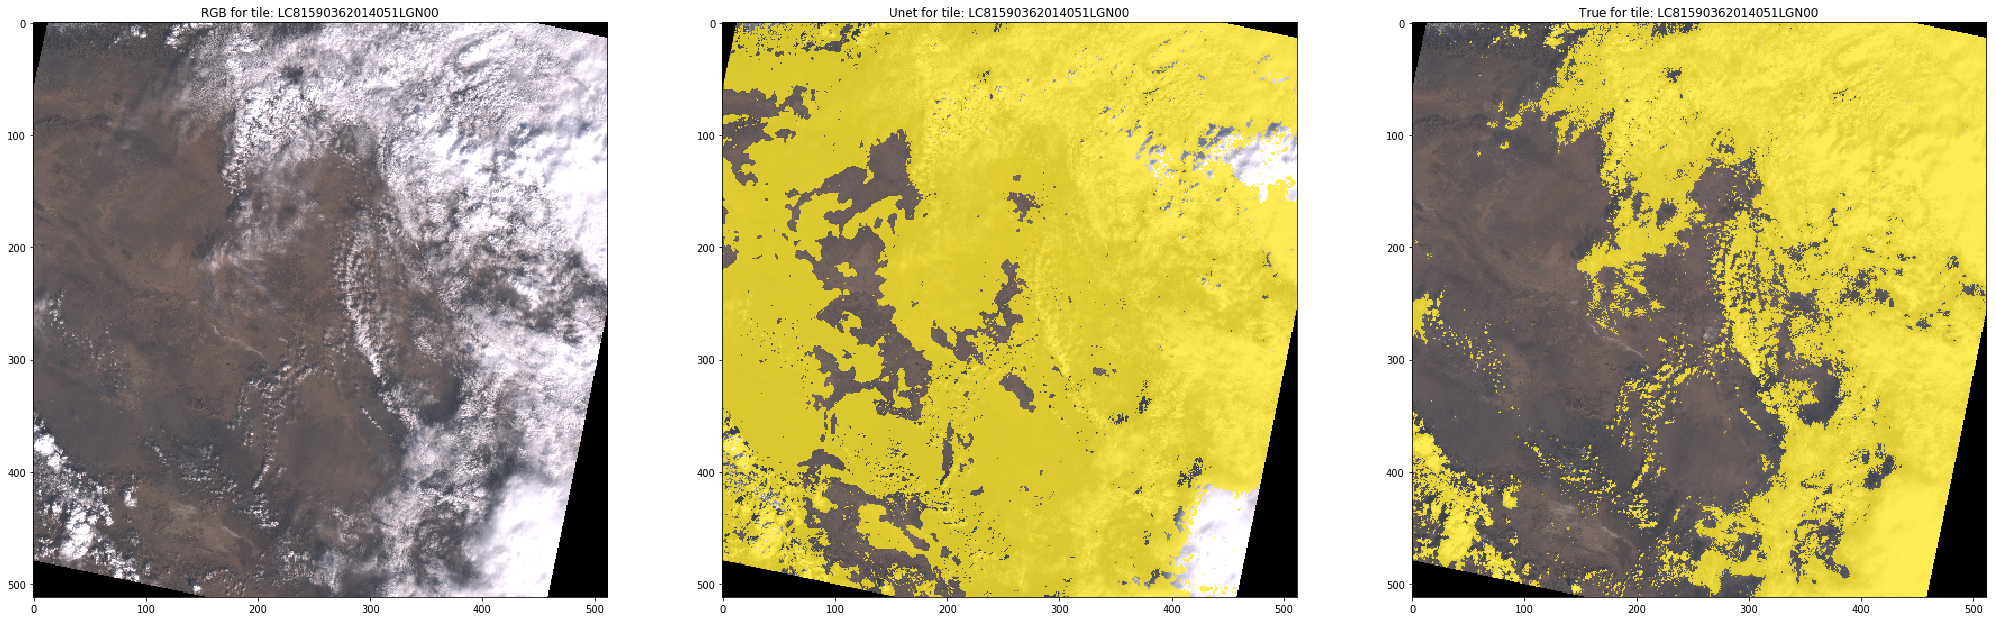

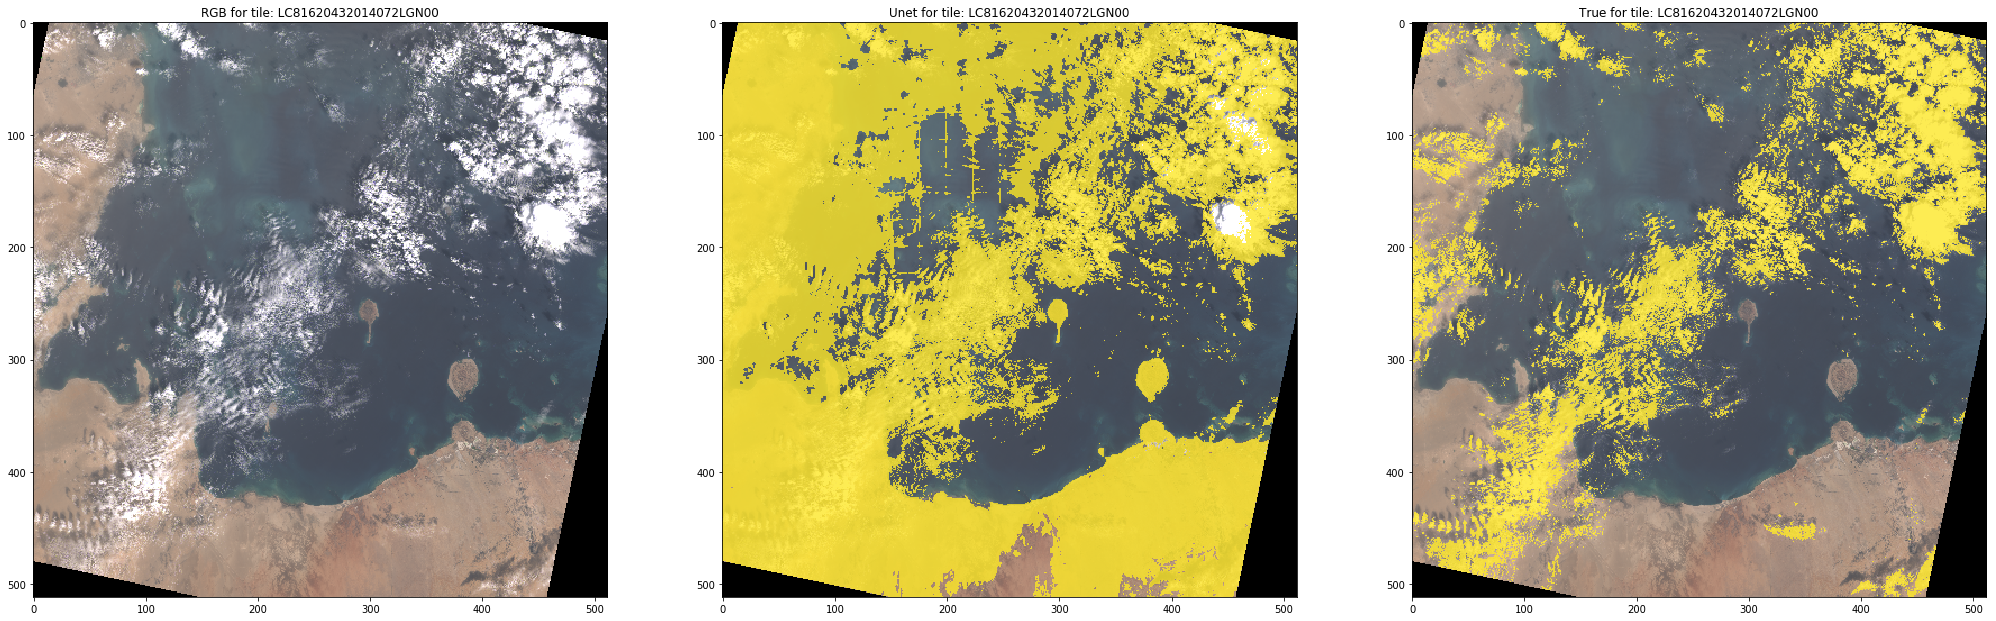

In [5]:
# Overlay pictures 
thresholded = True
transparency = 200
thumbnail_res = 512, 512  # Resolution to be showed
area = (1000, 1000, 7000, 7000)  # Area to be cropped in (min_width, min_height, max_width, max_height)
params.threshold = 0.5
model_name = get_model_name(params)

# Plot predictions
if tile == 'all':
    files = sorted(os.listdir(params.project_path + 'data/output/'))  # os.listdir loads in arbitrary order, hence use sorted()
    files = [f for f in files if ('thresholded_' + model_name) in f]  # Filter out one ID for each tile
else:
    files = [tile]
    
for i, f in enumerate(files, start=1):
    rgb, pred_unet, pred_true = get_predicted_thumbnails(f, thresholded, area, transparency, thumbnail_res, params)

    # Plot
    plt.figure(figsize=(35, 35))
    
    plt.subplot(1, 3, 1)
    plt.title('RGB for tile: ' + f[0:21])
    plt.imshow(rgb)
    
    plt.subplot(1, 3, 2)
    plt.title('Unet for tile: ' + f[0:21])
    plt.imshow(pred_unet)
    
    plt.subplot(1, 3, 3)
    plt.title('True for tile: ' + f[0:21])
    plt.imshow(pred_true)

    plt.show()